# Première étape : Nettoyage de données

## 1.  Filtrage des features 

### 1.1. Récupération de données

In [1]:
# Importation des librairies utiles
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [2]:
# Chargement de nos données
fr_openfoodfacts_org_products_df = pd.read_csv('./data/fr_openfoodfacts_org_products.csv', sep='\t', low_memory = False)
fr_openfoodfacts_org_products_df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fr_openfoodfacts_org_products_df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

### 1.2. La visualisation de nos données manquant à l'aide de missingno

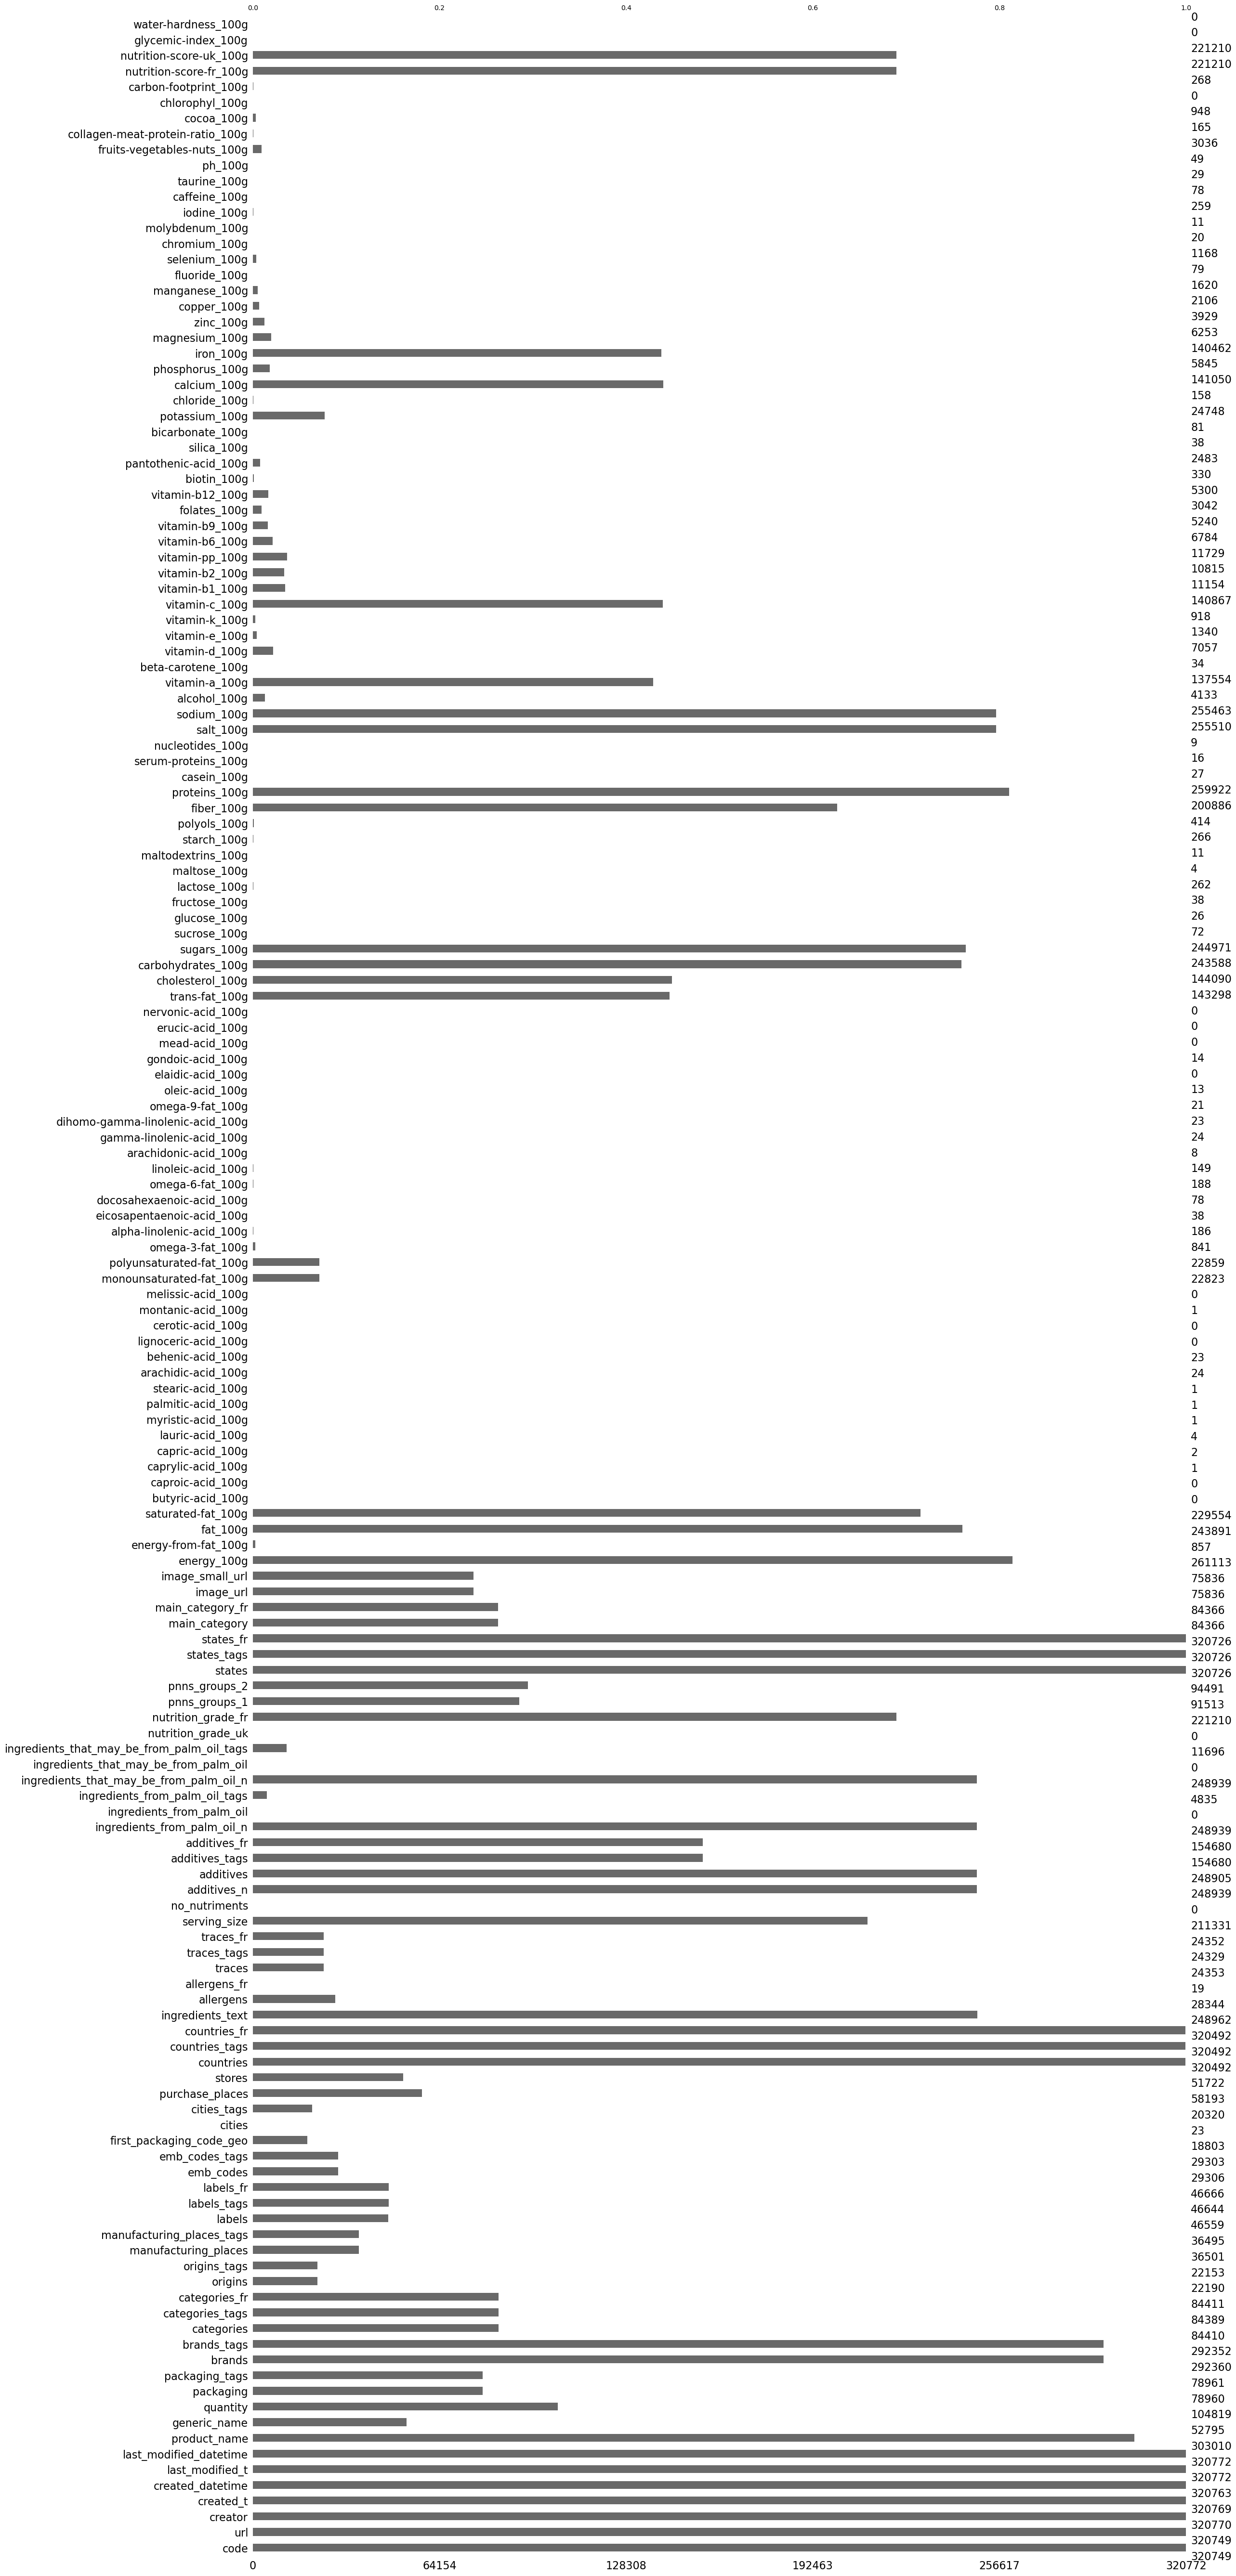

In [5]:
msno.bar(fr_openfoodfacts_org_products_df)
plt.savefig('fr_openfoodfacts_org_products_df_msno.png')

- Une représentation graphique du type de nos données

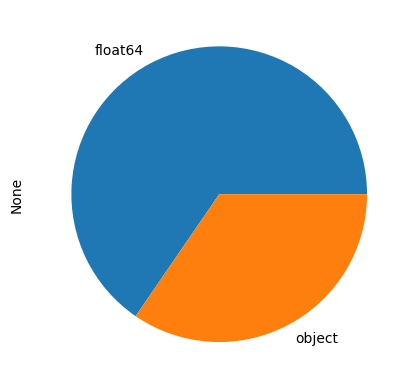

In [6]:
fr_openfoodfacts_org_products_df.dtypes.value_counts().plot.pie()
plt.savefig('fr_openfoodfacts_org_products_df_plot.png')

In [7]:
# Poucentage des données manquantes de notre jeu de données
def global_missing_values(data=fr_openfoodfacts_org_products_df):
    somme = 0
    for f in list(data.columns):
        somme += data[f].isna().sum()
    return (somme / (data.shape[0]*data.shape[1]))*100

global_missing_values()

76.22157263195135

### 1.3. Suppression des features pas suffisamment remplies

In [4]:
#Calculons le pourcentage de données manquantes par variable
missing_value_rate = fr_openfoodfacts_org_products_df.isnull().sum()
missing_value_rate = missing_value_rate/ fr_openfoodfacts_org_products_df.shape[0] *100
missing_value_rate

code                         0.007170
url                          0.007170
creator                      0.000623
created_t                    0.000935
created_datetime             0.002806
                              ...    
carbon-footprint_100g       99.916452
nutrition-score-fr_100g     31.038245
nutrition-score-uk_100g     31.038245
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 162, dtype: float64

- Appliquons un seuil à notre jeu de données

In [11]:
# suppression des colonnes avec un pourcentage élevé de données manquantes (>75%)
mask = missing_value_rate[missing_value_rate <= 75].index
data_keep = fr_openfoodfacts_org_products_df[mask]

In [55]:
data_keep.tail(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
320762,9908278636246,http://world-fr.openfoodfacts.org/produit/9908...,andre,1360585770,2013-02-11T12:29:30Z,1389960647,2014-01-17T12:10:47Z,Szprot w oleju roslinnym,170g,EvraFish,evrafish,pl:Szprot,pl:szprot,pl:Szprot,Poland,en:poland,Pologne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",pl:szprot,pl:Szprot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,50 g,Lobodis,lobodis,thés verts,"en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",France,en:france,France,"thé vert, arôme naturel bergamote avec autres ...",NaN,0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,NaN,NaN,0.0,0.0,c,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:green-teas,Thés verts,21.0,0.2,0.2,NaN,NaN,0.5,0.5,0.2,0.5,0.0254,0.01,NaN,NaN,NaN,NaN,2.0,0.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,180 g,"Sans marque,D.Lambert","sans-marque,d-lambert","Viandes,Produits à tartiner,Charcuteries,Produ...","en:meats,en:spreads,en:prepared-meats,en:salte...","Viandes,Produits à tartiner,Charcuteries,Produ...",France,en:france,France,"viande d'oie, graisse de canard, épices, sel, ...",NaN,0.0,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,NaN,NaN,0.0,0.0,NaN,Fish Meat Eggs,Processed meat,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:salted-spreads,Produits à tartiner salés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320766,99410148,http://world-fr.openfoodfacts.org/produit/9941...,date-limite-app,1463936572,2016-05-22T17:02:52Z,1491244498,2017-04-03T18:34:58Z,NaN,NaN,NaN,NaN,Peanuts,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",United Kingdom,en:united-kingdom,Royaume-Uni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salty snacks,Nuts,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",en:nuts,Fruits à coques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contribu

- Une représentation graphique des données retenues

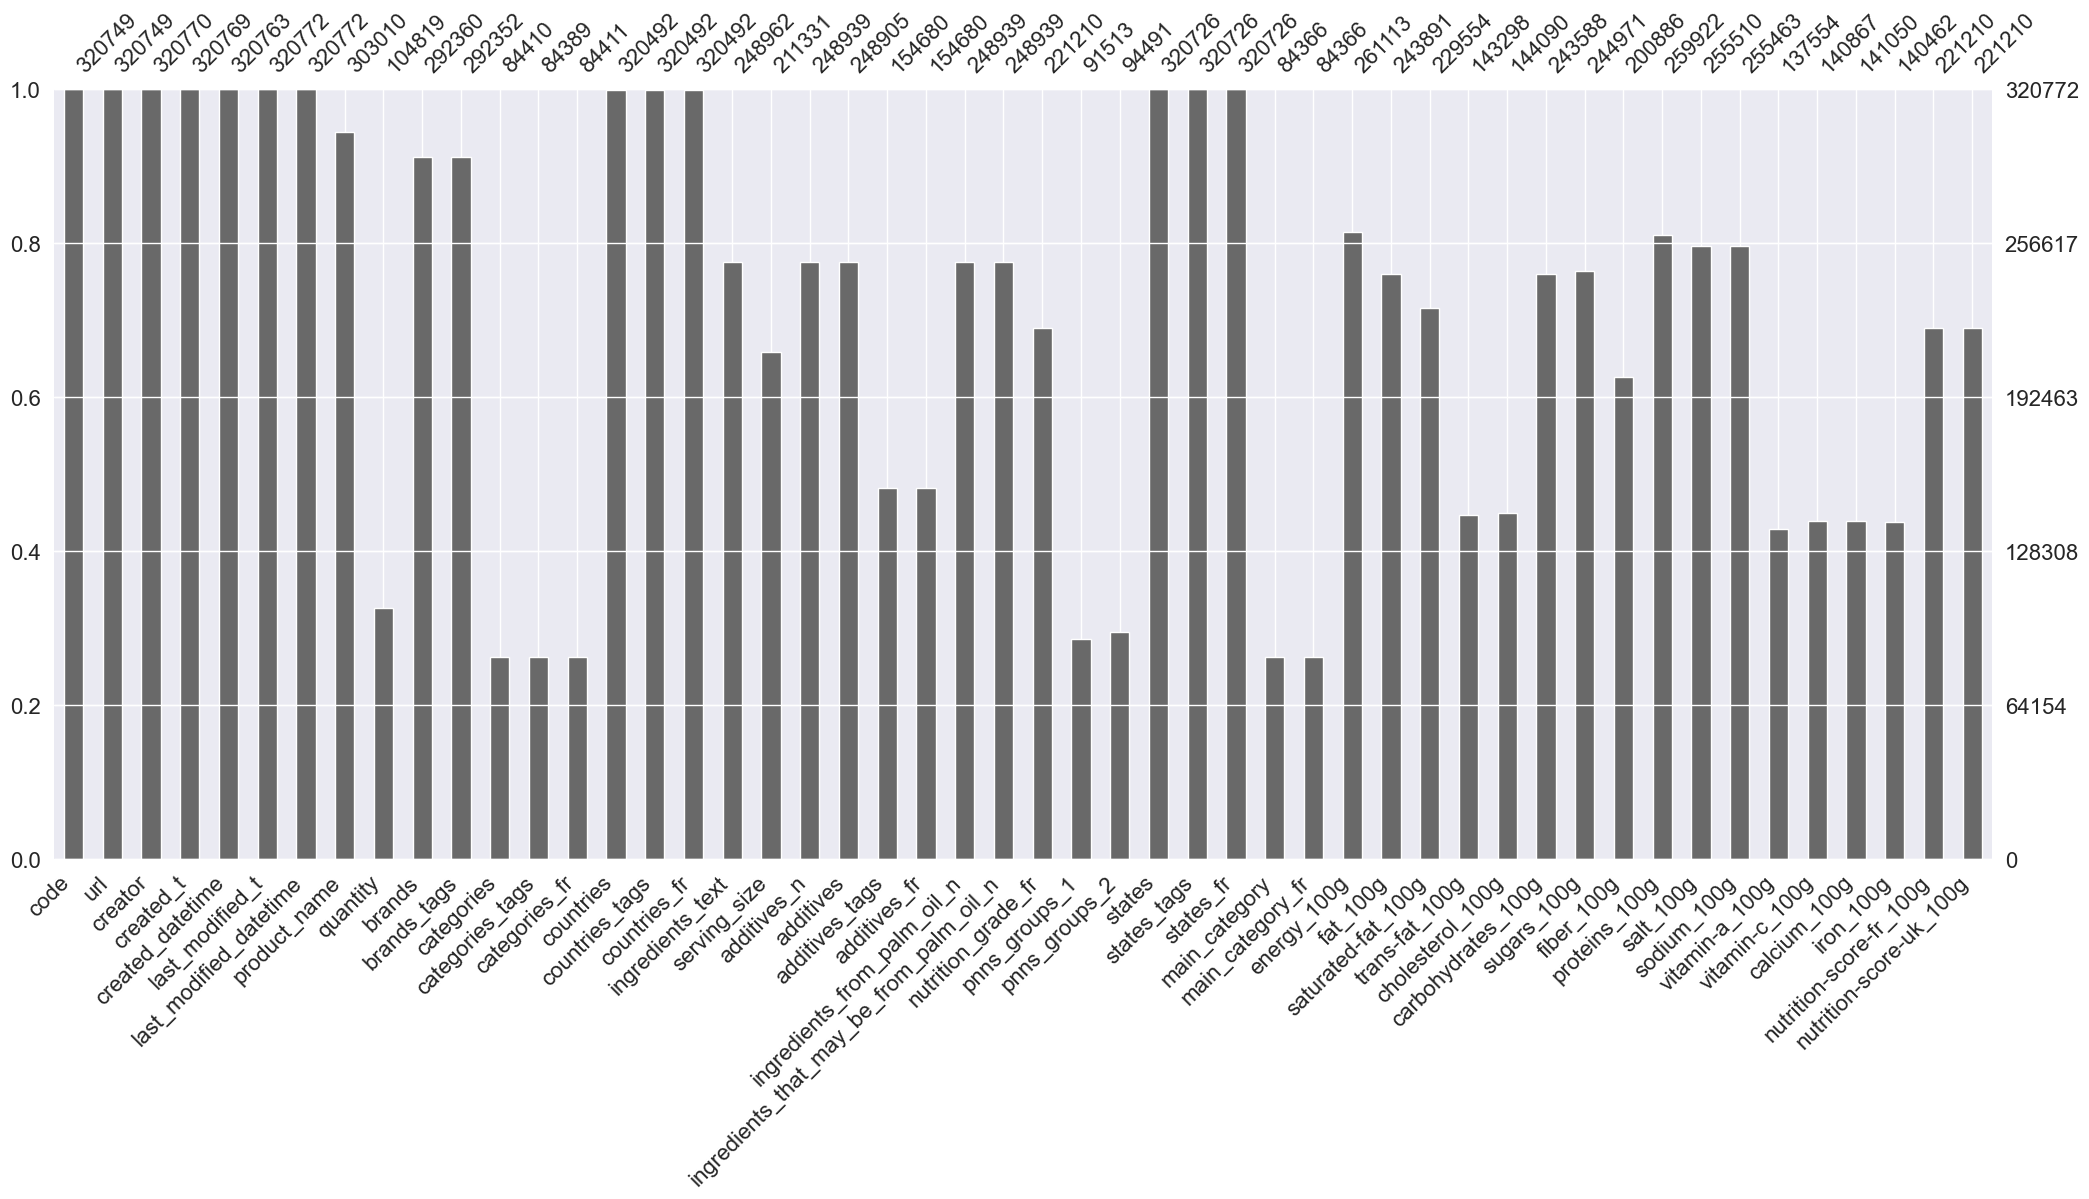

In [12]:
msno.bar(data_keep)
plt.savefig('data_keep.png')

Nous constatons qu'il y a des produits sans nom

In [13]:
# Suppression des produits sans nom
data_keep.dropna(subset=['product_name'], inplace=True) 

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\2675042675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep.dropna(subset=['product_name'], inplace=True)


In [7]:
rows, cols = data_keep.shape
print(f'Le jeu de données contient {rows} lignes et {cols} colonnes.')

Le jeu de données contient 303010 lignes et 50 colonnes.


- La représentation graphique du jeu de données après suppression des produits sans nom

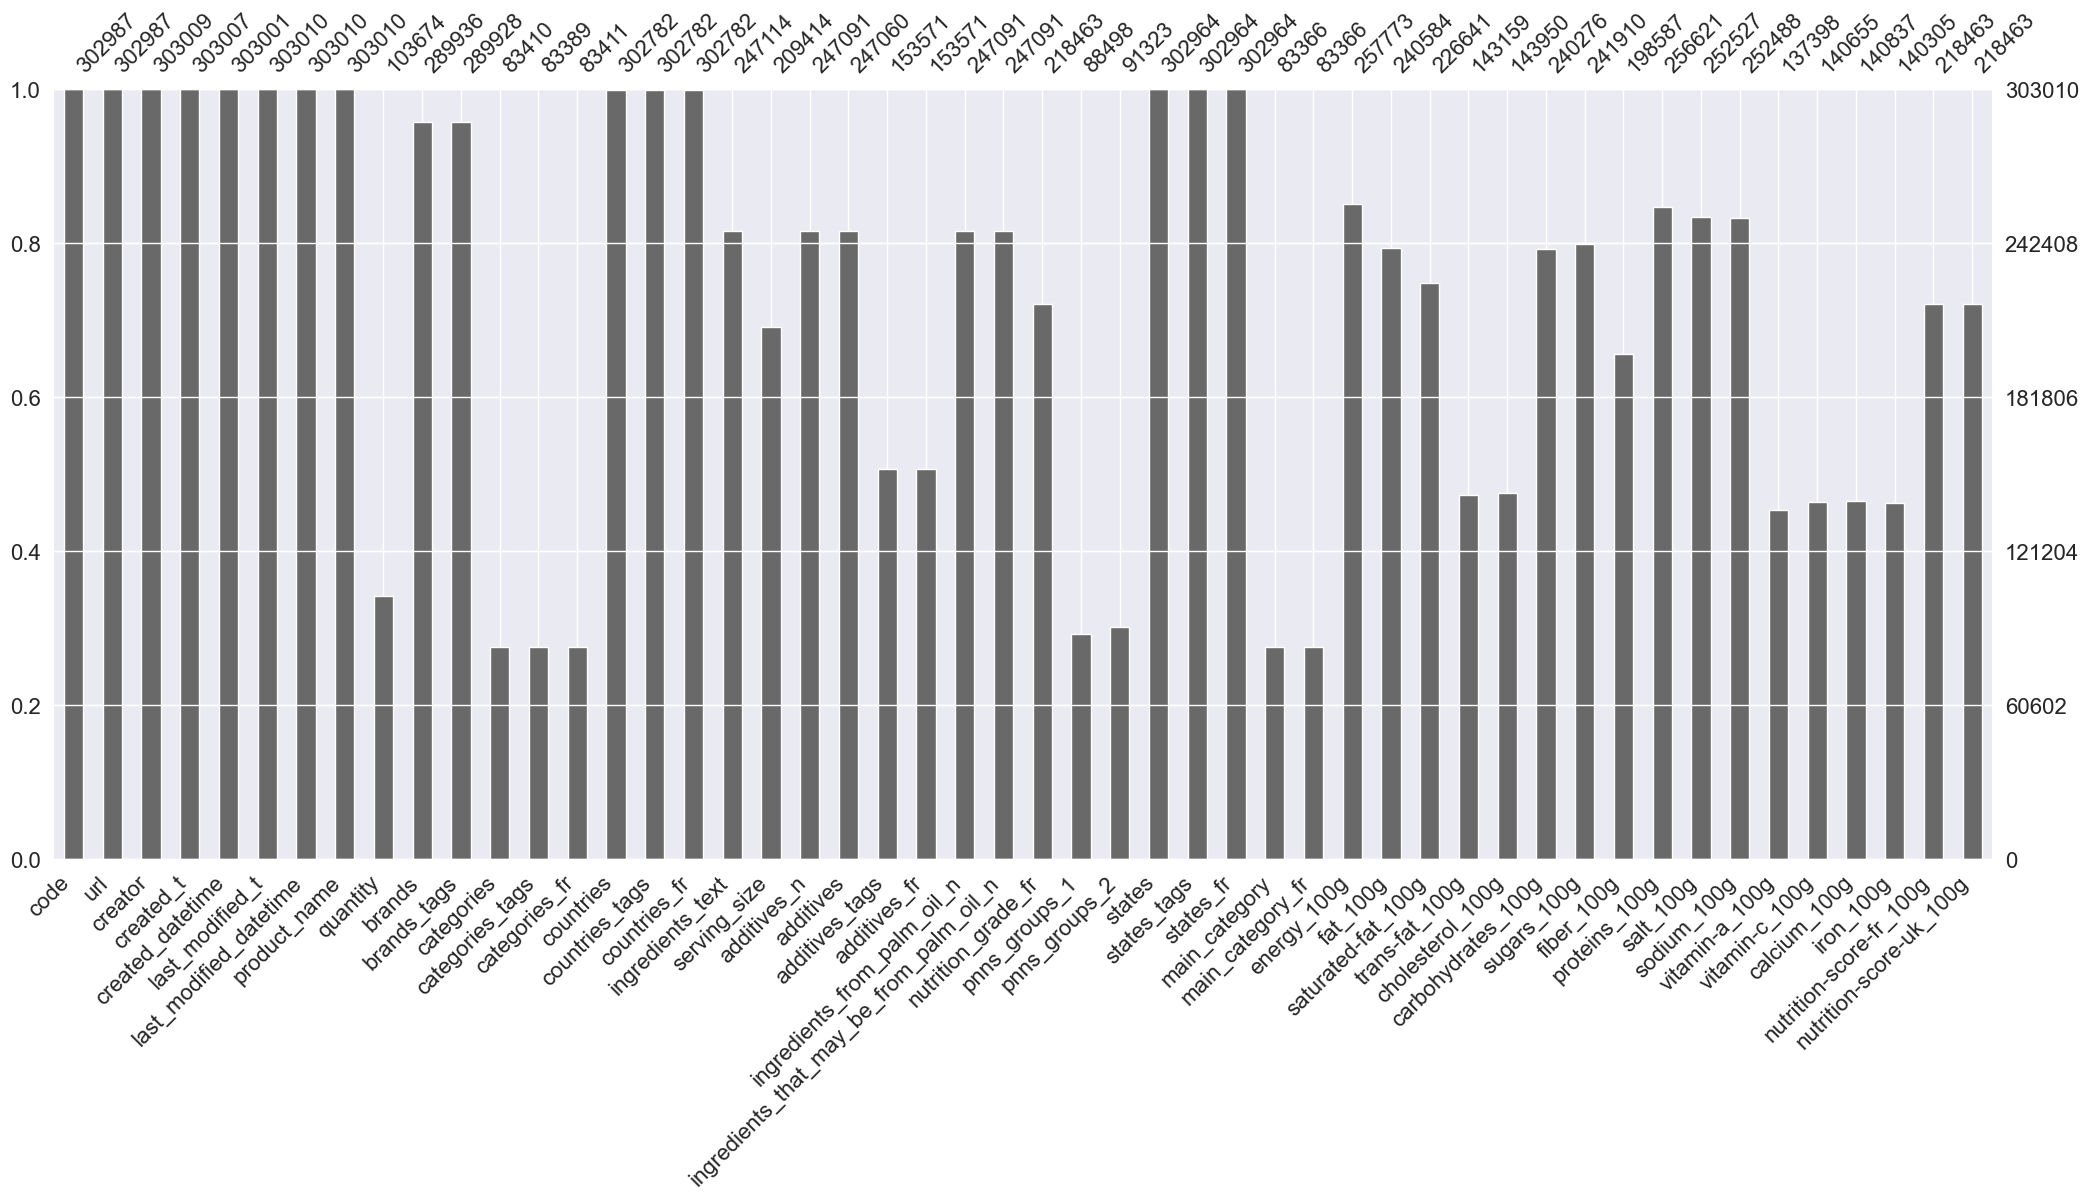

In [14]:
msno.bar(data_keep)
plt.savefig('data_keep_wPName.png')

In [15]:
pd.set_option('display.max_rows', None) #Visualiser le maximum possible d'information
pd.set_option('display.max_columns', None) #Visualiser le maximum possible d'information
data_keep.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303010 entries, 0 to 320771
Data columns (total 50 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     302987 non-null  object 
 1   url                                      302987 non-null  object 
 2   creator                                  303009 non-null  object 
 3   created_t                                303007 non-null  object 
 4   created_datetime                         303001 non-null  object 
 5   last_modified_t                          303010 non-null  object 
 6   last_modified_datetime                   303010 non-null  object 
 7   product_name                             303010 non-null  object 
 8   quantity                                 103674 non-null  object 
 9   brands                                   289936 non-null  object 
 10  brands_tags                     

C:\Users\tidib\AppData\Local\Temp\ipykernel_1852\823891469.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_keep.info(verbose=True,null_counts=True)


## 2. Vérification des doublons

In [16]:
# affichage des entrées multiples dans notre dataset
data_keep.duplicated().sum()

0

In [17]:
data_keep = data_keep.drop_duplicates()

In [18]:
data_keep.shape

(303010, 50)

In [19]:
data_keep.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Suprimons les colonnes qui ne sont pas d'une grande utilité pour la réalisation de l'application

In [15]:
cols_to_delete = ['url', 'creator', 'created_t', 'last_modified_t', 'last_modified_datetime', 'quantity', 'brands_tags', 'categories_tags', 'categories_fr', 'countries_fr', 
                  'countries_tags', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n','pnns_groups_1', 'pnns_groups_2',  
                  'states', 'states_tags', 'main_category', 'main_category_fr', 'saturated-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'nutrition-score-uk_100g']
data_keep.drop(cols_to_delete, axis=1, inplace=True)

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\3688472733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep.drop(cols_to_delete, axis=1, inplace=True)


In [21]:
data_keep.columns

Index(['code', 'created_datetime', 'product_name', 'brands', 'categories',
       'countries', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'nutrition_grade_fr', 'states_fr', 'energy_100g',
       'fat_100g', 'cholesterol_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [45]:
data_keep.head()

,code,created_datetime,product_name,brands,categories,countries,ingredients_text,serving_size,additives_n,additives,nutrition_grade_fr,states_fr,energy_100g,fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,2016-09-17T09:17:46Z,Farine de blé noir,Ferme t'y R'nao,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,d,"A compléter,Informations nutritionnelles compl...",2243.0,28.57,0.018,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
2,0000000004559,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,"A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.000,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
3,0000000016087,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,"A compléter,Informations nutritionnelles compl...",2540.0,57.14,NaN,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0
4,0000000016094,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,NaN,US,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,"A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data_keep.shape

(303010, 25)

## 3. Valeurs aberrantes

Nous pouvons observer des informations statistiques sur cet ensemble de données

In [47]:
data_keep.describe()

,additives_n,energy_100g,fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,247091.000000,2.577730e+05,240584.000000,143950.000000,241910.000000,198587.000000,256621.000000,252527.000000,252488.000000,137398.000000,140655.00000,140837.000000,140305.000000,218463.000000
mean,1.937748,1.140497e+03,12.701388,0.020079,15.993129,2.863581,7.073898,2.037957,0.802467,0.000397,0.02335,0.125119,0.003654,9.151724
std,2.503582,6.484434e+03,17.574028,0.358234,22.345150,12.933636,8.418674,129.023620,50.800621,0.073320,2.23813,3.320757,0.214528,9.052588
min,0.000000,0.000000e+00,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.00210,0.000000,-0.000260,-15.000000
25%,0.000000,3.730000e+02,0.000000,0.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,1.000000,1.100000e+03,5.000000,0.000000,5.710000,1.500000,4.760000,0.584200,0.230000,0.000000,0.00000,0.035000,0.001010,10.000000
75%,3.000000,1.674000e+03,20.000000,0.020000,24.000000,3.600000,10.000000,1.379220,0.543000,0.000107,0.00370,0.106000,0.002400,16.000000
max,31.000000,3.251373e+06,714.290000,95.238000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.98110,694.737000,50.000000,40.000000


On peut observer que des variables comme « sugars_100g », « proteins_100g » ont une valeur maximale très différée par rapport à la valeur de 75 %, nous pouvons donc dire que certaines observations agissent comme des valeurs aberrantes dans l’ensemble de données. De même, la valeur minimale dans ces colonnes diffère considérablement de la valeur de 25 %, ce qui signifie la présence de valeurs aberrantes. 

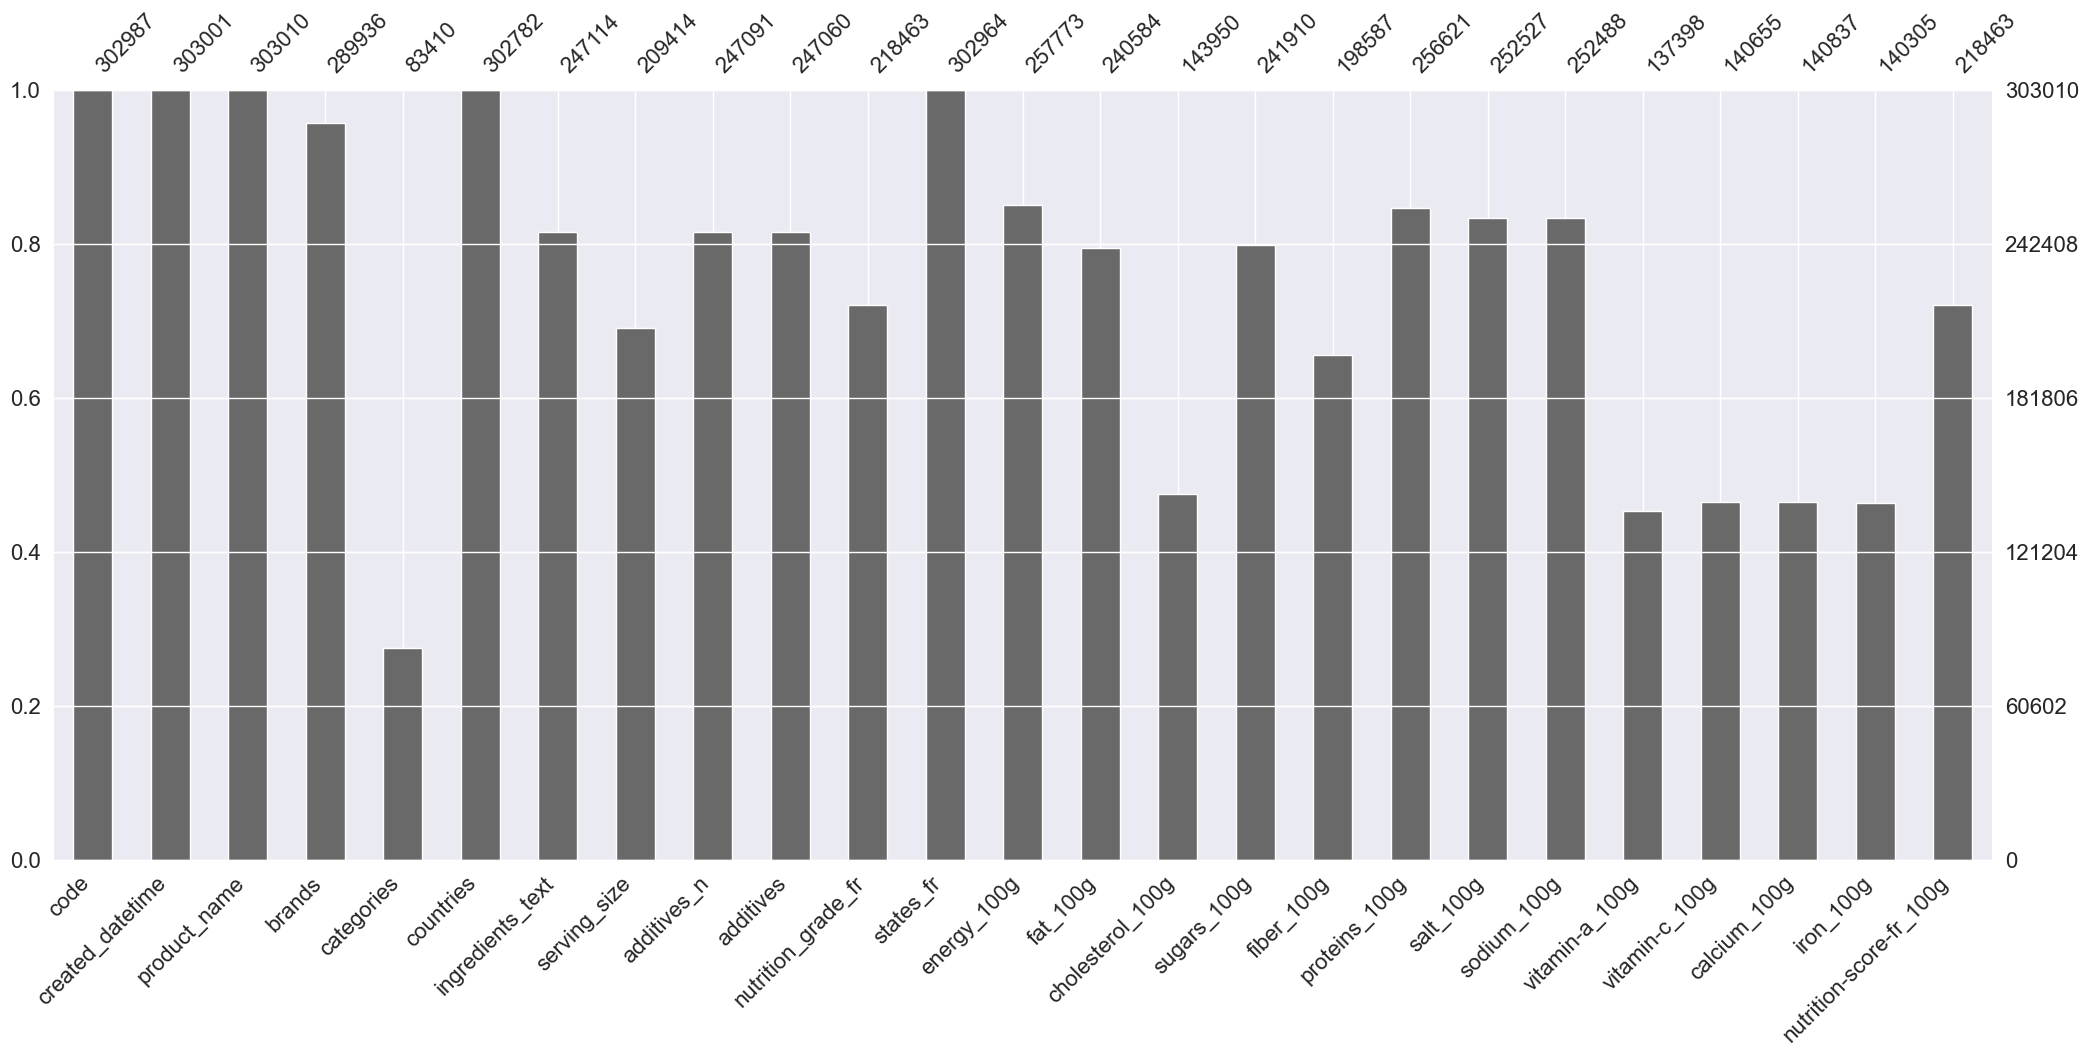

In [16]:
msno.bar(data_keep)
plt.savefig('data_keep_after_delete.png')

### 3.1. Traitement des valeurs aberrantes par la méthode des interquartiles

- Détection des outliers

Exemple de visualisation de outliers par colonne (sugars_100g, proteins_100g)

C:\Users\tidib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


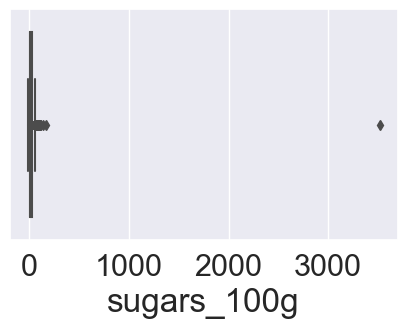

In [17]:
plt.figure(figsize=(5,3))
sns.boxplot(data_keep['sugars_100g'])
plt.show()

C:\Users\tidib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


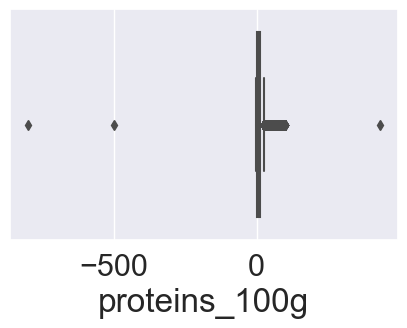

In [36]:
plt.figure(figsize=(5,3))
sns.boxplot(data_keep['proteins_100g'])
plt.show()

Vues des ouliers de l'ensemble des colonnes à l'aide de la boite à moustache

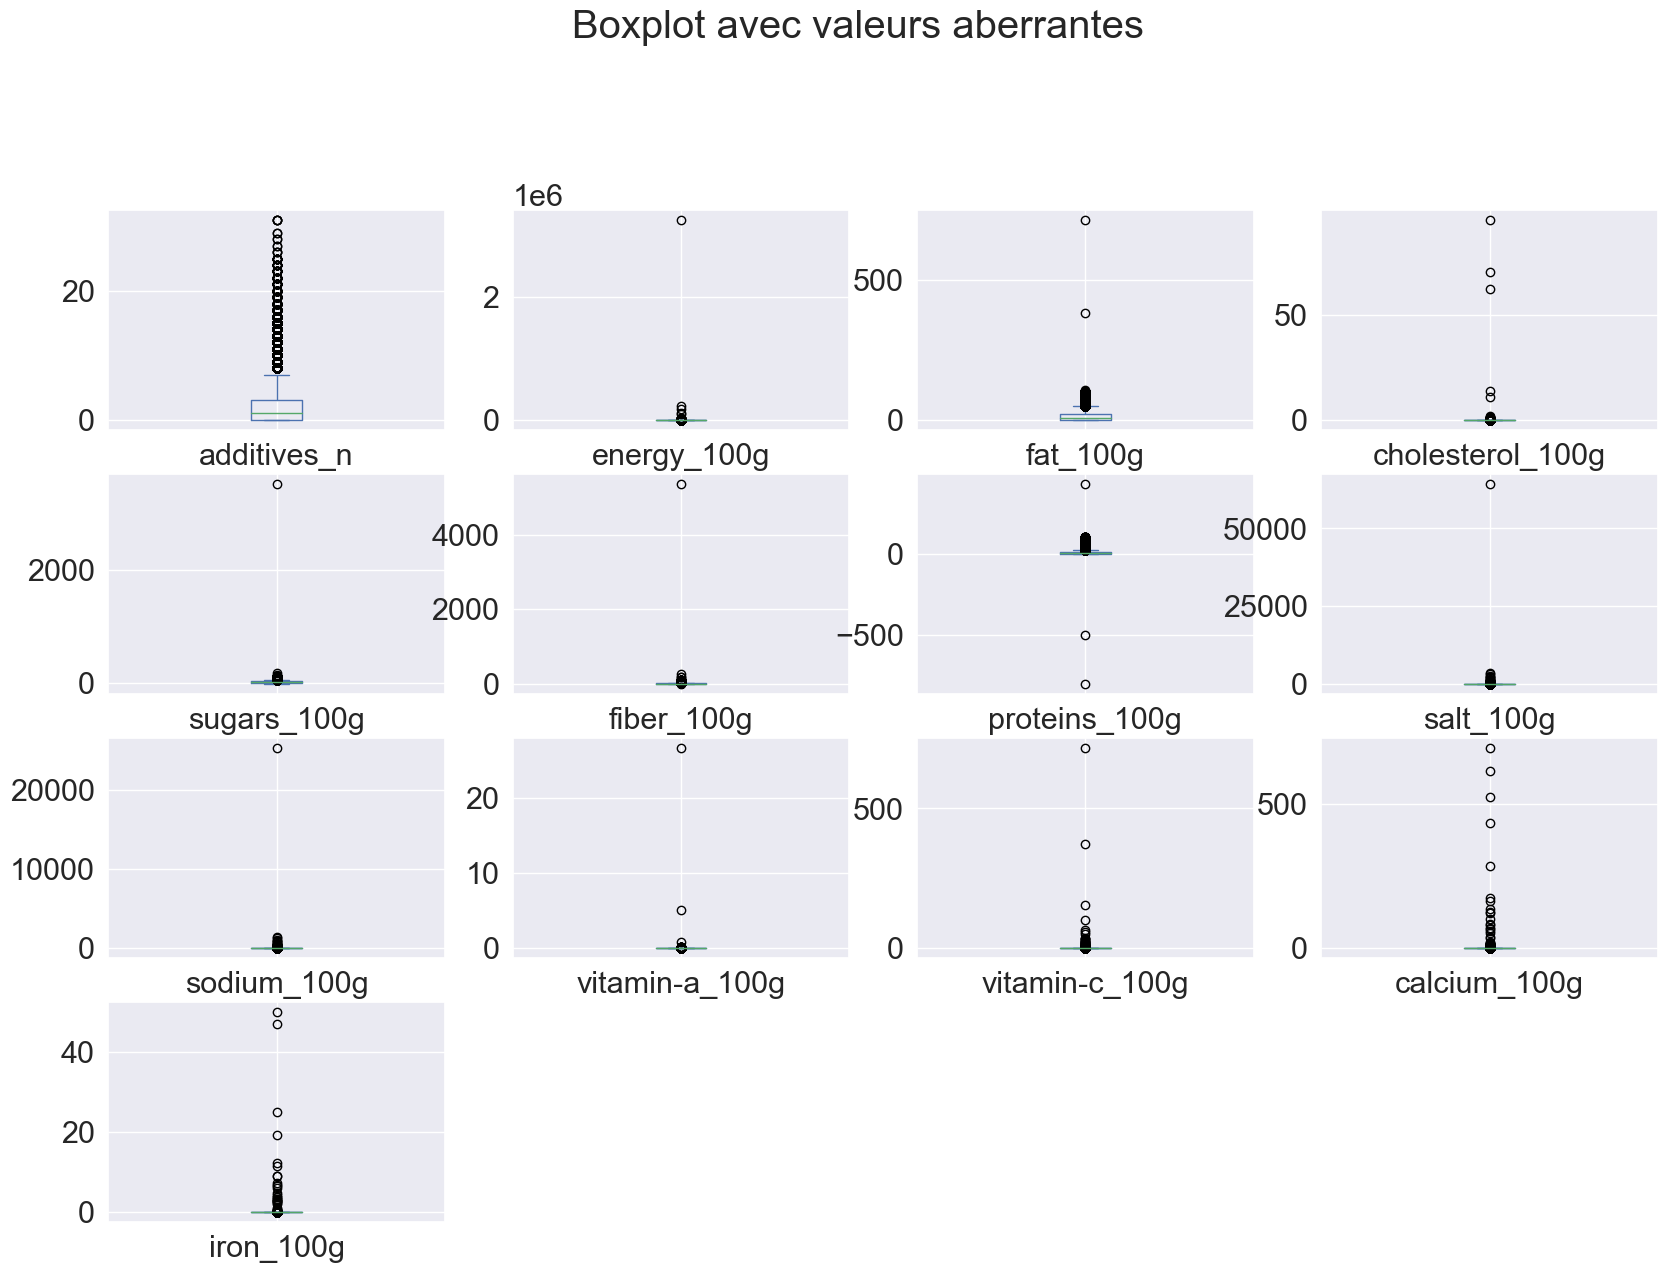

In [18]:
cols = ['additives_n', 'energy_100g', 'fat_100g', 'cholesterol_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 
        'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']

sns.set(font_scale=2)
data_keep[cols].select_dtypes(include=float).plot(kind='box', subplots=True, title='Boxplot avec valeurs aberrantes', figsize=(20,20), layout=(6,4))
plt.savefig('boxplot_with_aber.png')
plt.show()

- Traitons les outliers

In [49]:
#On supprime les valeurs aberrantes

#On calcule Q1

q1=data_keep[cols].quantile(q=0.25)

#On calcule Q3

q3=data_keep[cols].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

data_keep=data_keep[data_keep[cols]<borne_sup]
data_keep=data_keep[data_keep[cols]>borne_inf]

In [50]:
data_keep.shape

(303010, 25)

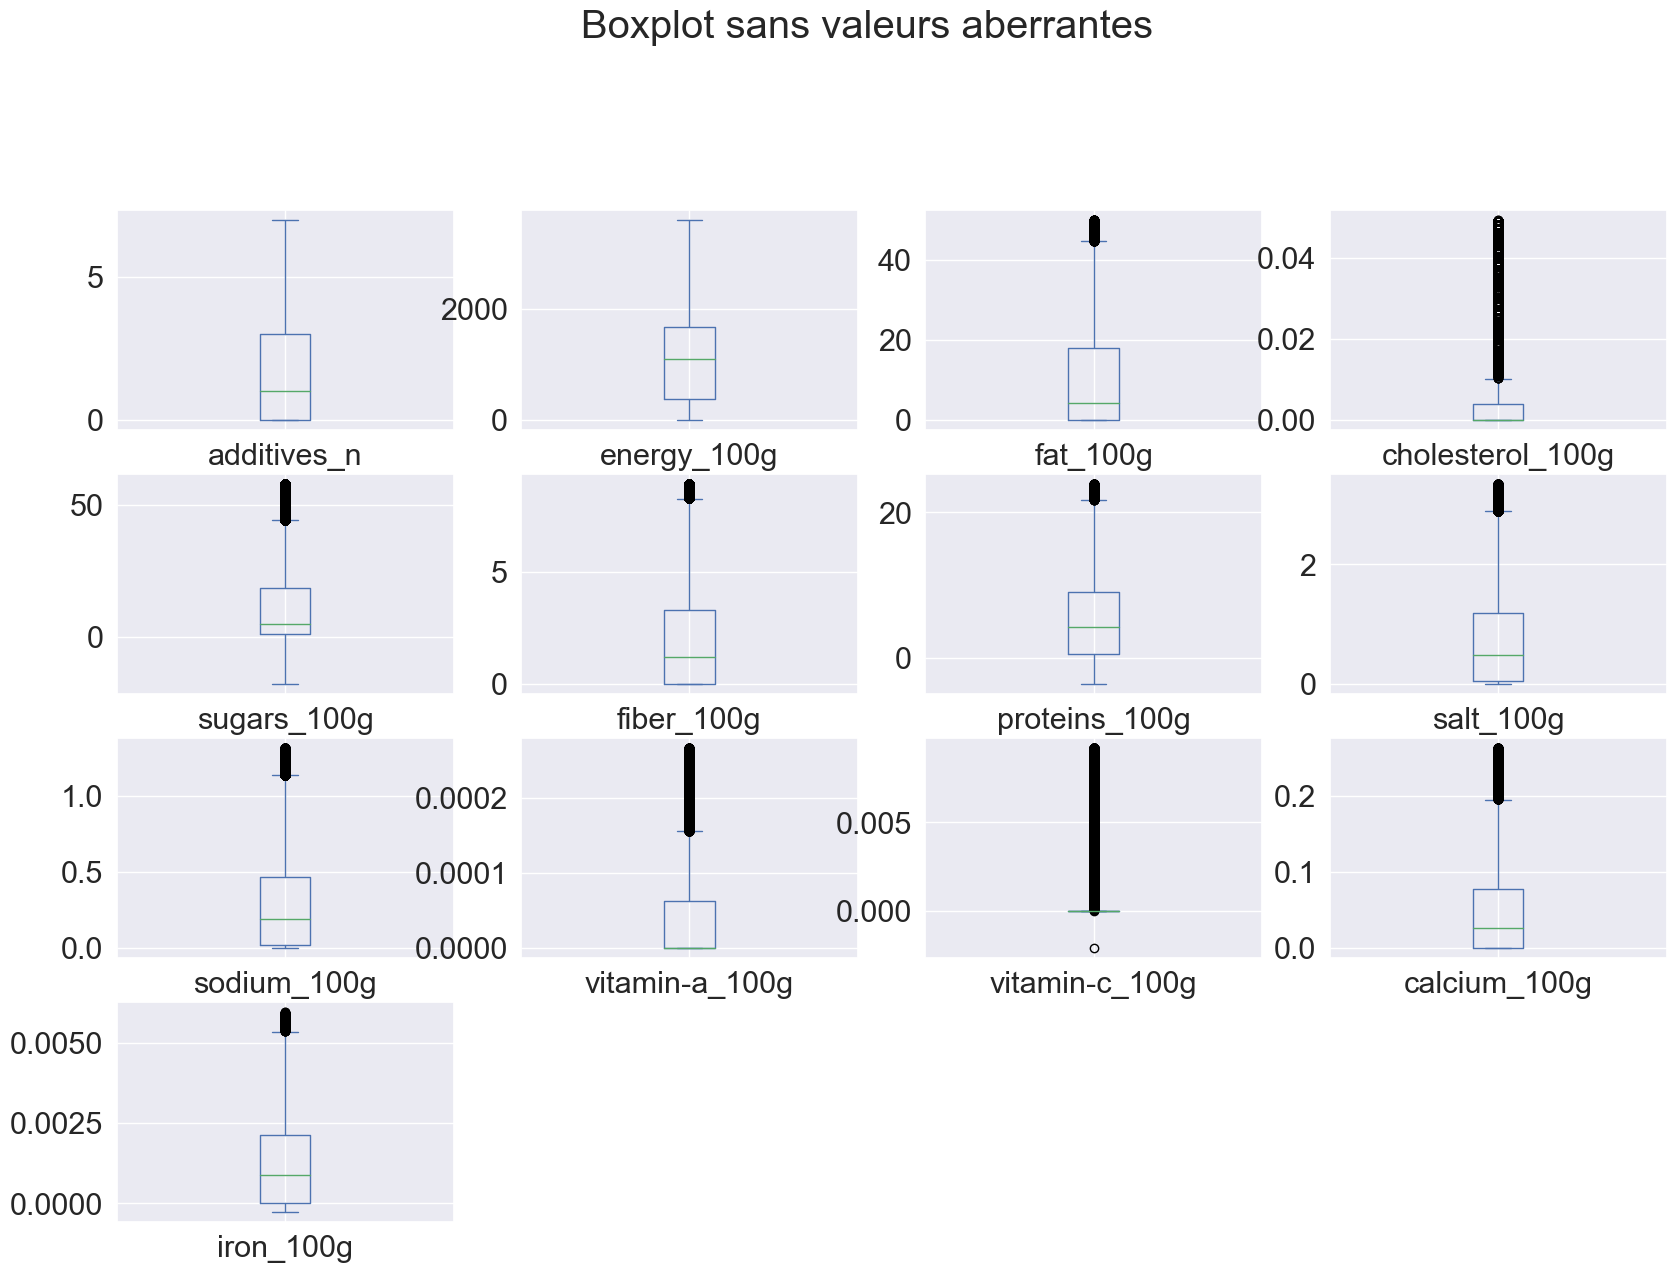

In [51]:
sns.set(font_scale=2)
data_keep[cols].select_dtypes(include=float).plot(kind='box', subplots=True, title='Boxplot sans valeurs aberrantes', figsize=(20,20), layout=(6,4))
plt.savefig('boxplot_after_aber.png')
plt.show()

Une représentation par variable après traitement des outliers (exemple de sugars_100g et proteins_100g)

C:\Users\tidib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


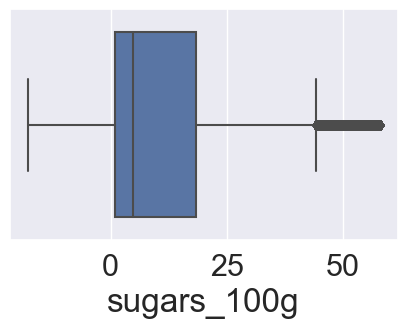

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(data_keep['sugars_100g'])
plt.show()

C:\Users\tidib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


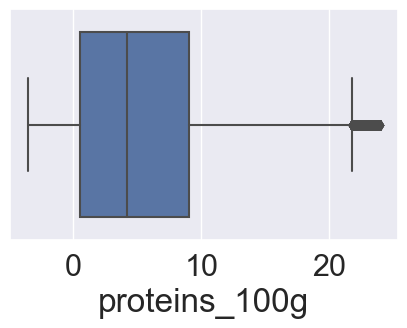

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(data_keep['proteins_100g'])
plt.show()

###  3.2. Approche métier pour traiter les valeurs aberrantes

Les valeurs des produits alimentaires doivent être comprisent entre 0 et 100g, une valeur négative ou >100g est aberrante. Filtrons les valeurs qui sont hors de cet interval.

In [19]:
# Une fonction pour remplaçer les outliers et la valeur 0 par nan   
cols = ['additives_n', 'energy_100g', 'fat_100g', 'cholesterol_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 
        'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g']
def replace_by_NaN(df, columns):
    for column in columns:
        df[column] = np.where(df[column] <= 0, np.nan, df[column])
        df[column] = np.where(df[column] > 100, np.nan, df[column])
    return df

In [20]:
data_keep = replace_by_NaN(data_keep, cols)

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\3130075015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] <= 0, np.nan, df[column])
C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\3130075015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > 100, np.nan, df[column])


In [68]:
data_keep.shape

(303010, 25)

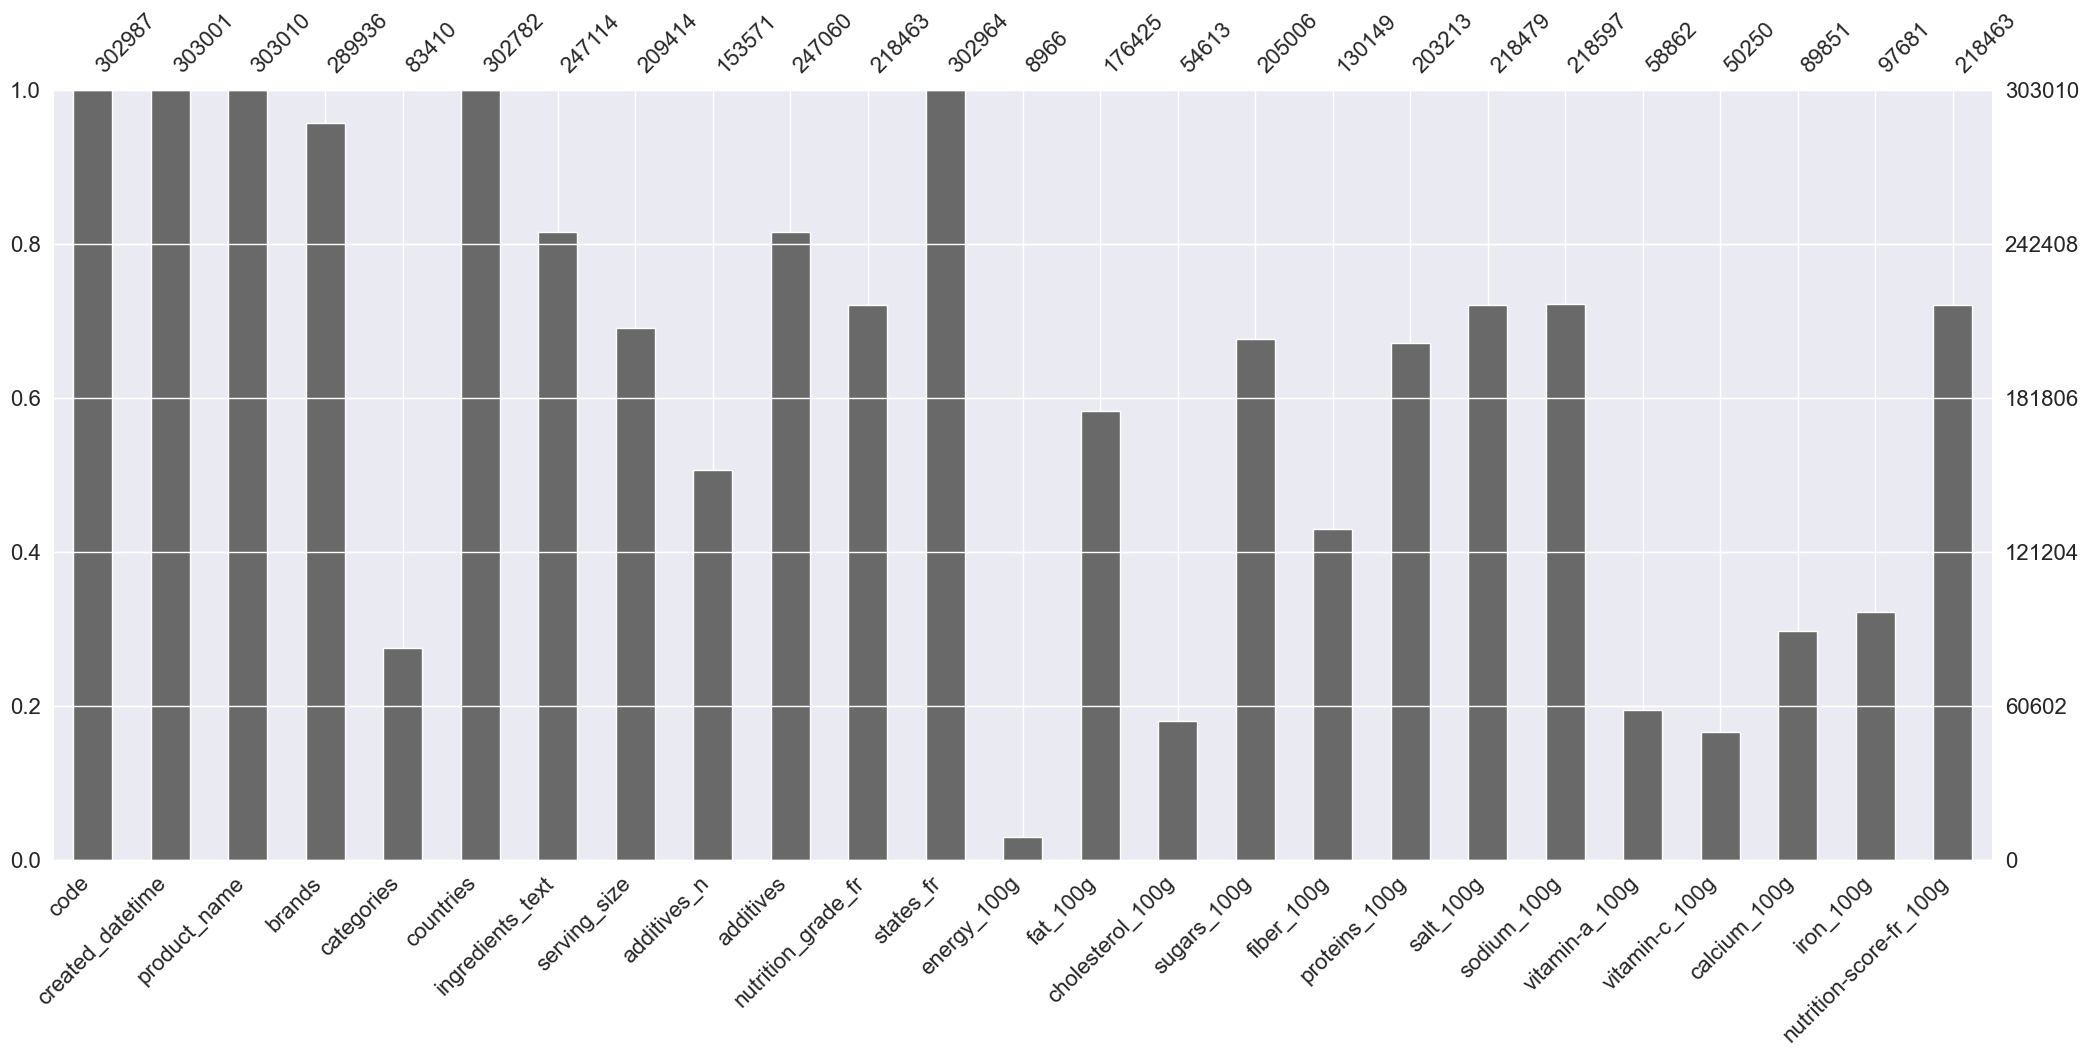

In [21]:
msno.bar(data_keep)
plt.savefig('outliers_by_nan.png')

In [41]:
data_keep.head()

,code,created_datetime,product_name,brands,categories,countries_fr,ingredients_text,serving_size,additives_n,additives,nutrition_grade_fr,states_fr,energy_100g,fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,2016-09-17T09:17:46Z,Farine de blé noir,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),NaN,[ bananas -> en:bananas ] [ vegetable-oil -...,d,"A compléter,Informations nutritionnelles compl...",NaN,28.57,0.018,14.29,3.6,3.57,NaN,NaN,NaN,0.0214,NaN,0.00129,14.0
2,0000000004559,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),NaN,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,b,"A compléter,Informations nutritionnelles compl...",NaN,17.86,NaN,17.86,7.1,17.86,0.63500,0.250,NaN,NaN,0.071,0.00129,0.0
3,0000000016087,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,NaN,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),NaN,[ organic-hazelnuts -> en:organic-hazelnuts ...,d,"A compléter,Informations nutritionnelles compl...",NaN,57.14,NaN,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0
4,0000000016094,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,NaN,États-Unis,Organic polenta,35 g (0.25 cup),NaN,[ organic-polenta -> en:organic-polenta ] [...,NaN,"A compléter,Informations nutritionnelles compl...",NaN,1.43,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Taux de remplissage avant imputation

In [22]:
# Une fontion pour déterminer le taux de remplissage de notre jeu de données avant imputation
def filling_rate(df):
    val_notnull = df.count().sum()
    rows,columns=df.shape
    taux=val_notnull/(rows*columns)*100   
    # Informations générales pour le camembert
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Taux de remplissage avant imputation", fontsize=25) 

    ax.axis("equal") 

    # Affichage du camembert
    ax.pie([taux, 100 - taux], labels=["Taux de remplissage", "Taux de valeurs manquantes"], autopct='%0.2f%%', explode=(0,0.1), radius=1)
    plt.legend(["Taux de remplissage", "Taux de valeurs manquantes"])

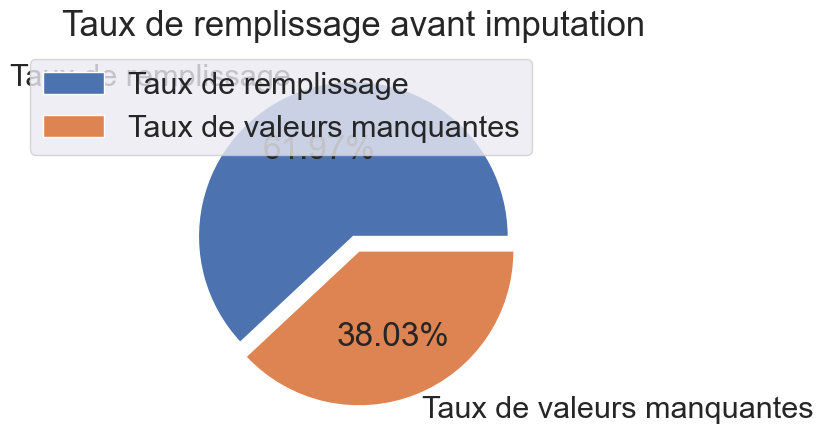

In [23]:
# Affichage du taux avant imputation 
filling_rate(data_keep)
plt.savefig('rate_data_before.png')

## 4. Valeurs manquantes

### 4.1.  Imputation simple

- Imputation des colonnes quantitives numériques

In [24]:
#Les valeurs manquantes sont représentées à l'aide de NaN et donc spécifiées.
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer = imputer.fit(data_keep[cols])
data_keep[cols] = imputer.transform(data_keep[cols])

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\559644943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep[cols] = imputer.transform(data_keep[cols])


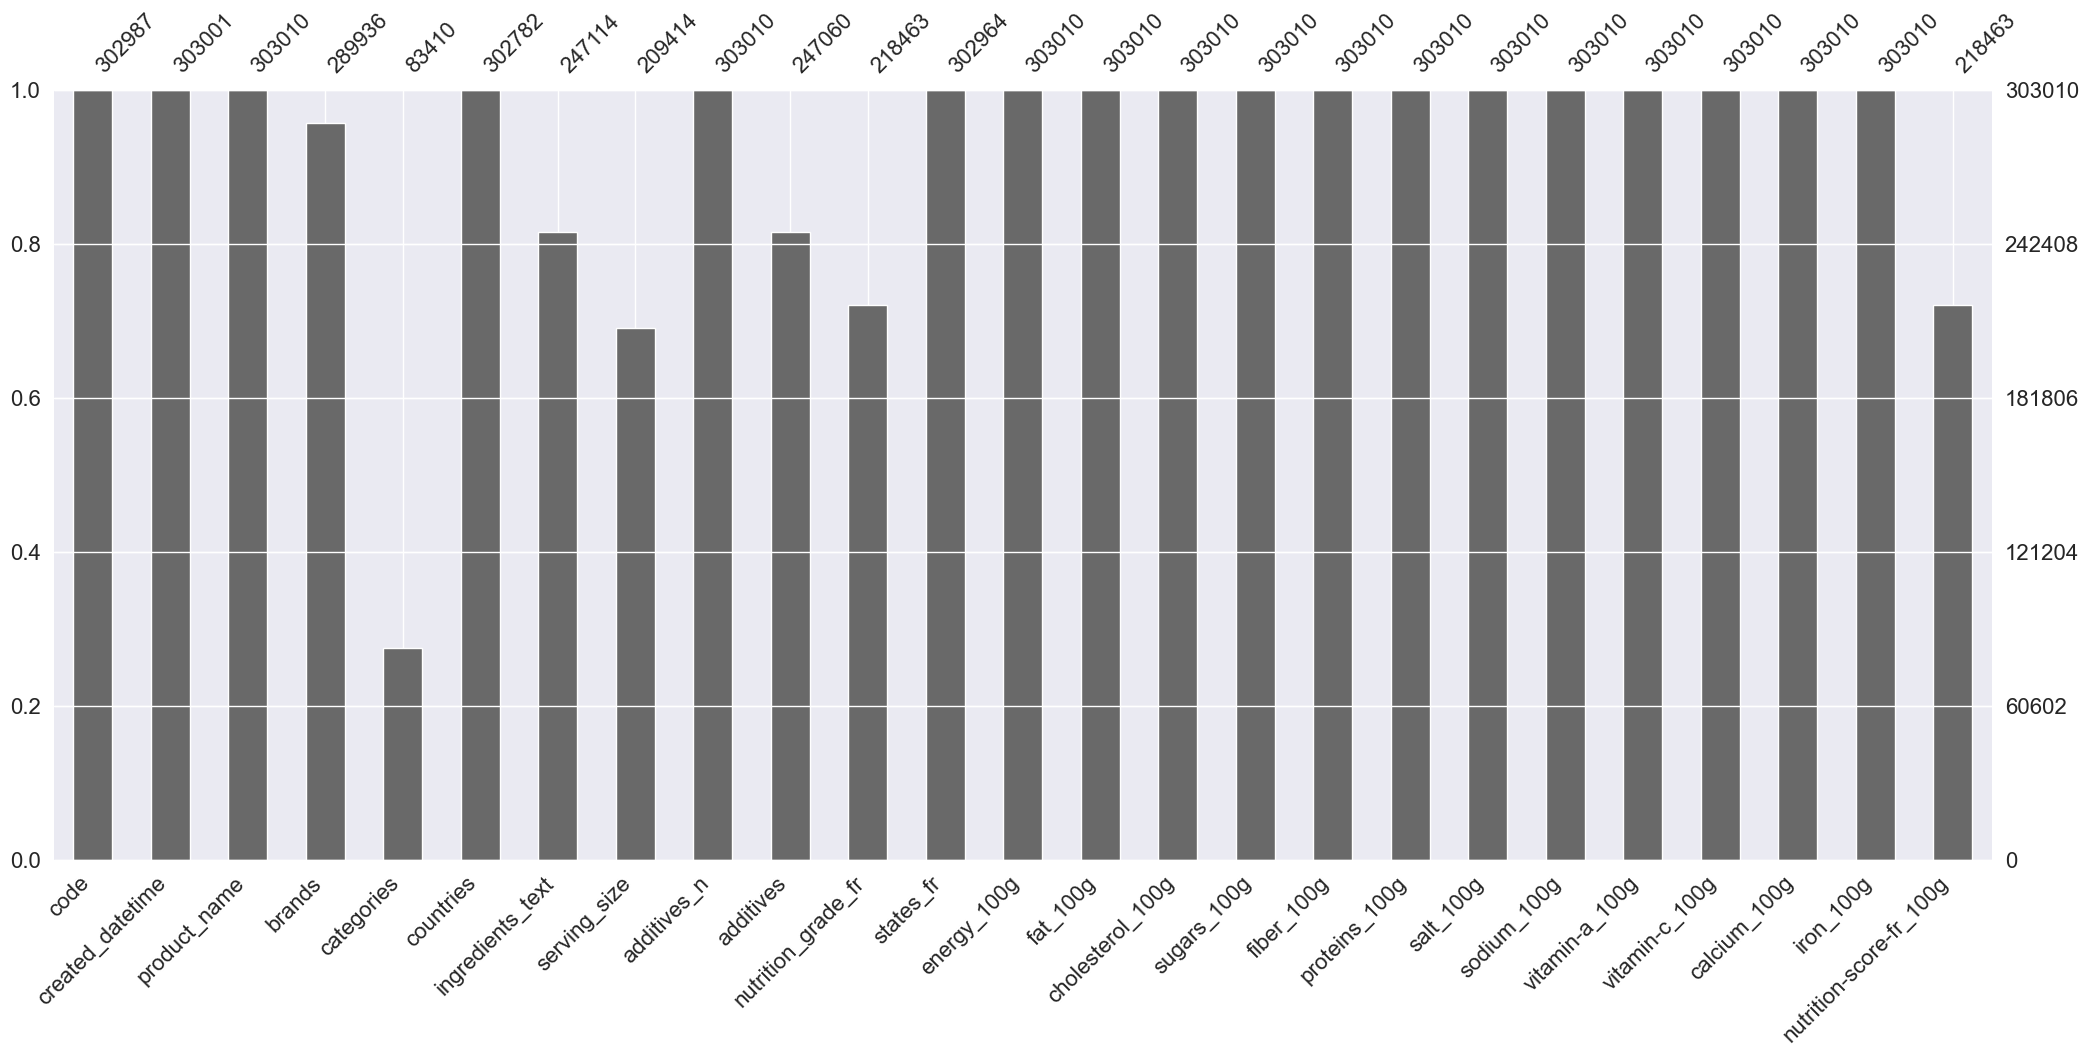

In [25]:
msno.bar(data_keep)
plt.savefig('data_keep_simplle_imput.png')

In [75]:
categorical_features = data_keep.select_dtypes(include = ['object']).columns.values
categorical_features

array(['code', 'created_datetime', 'product_name', 'brands', 'categories',
       'countries', 'ingredients_text', 'serving_size', 'additives',
       'nutrition_grade_fr', 'states_fr'], dtype=object)

- Imputation des colonnes cathégorielles

In [26]:
cols_cat = ['brands', 'categories', 'ingredients_text', 'serving_size', 'additives']
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data_keep[cols_cat] = imputer.fit_transform(data_keep[cols_cat])

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\1741516033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep[cols_cat] = imputer.fit_transform(data_keep[cols_cat])


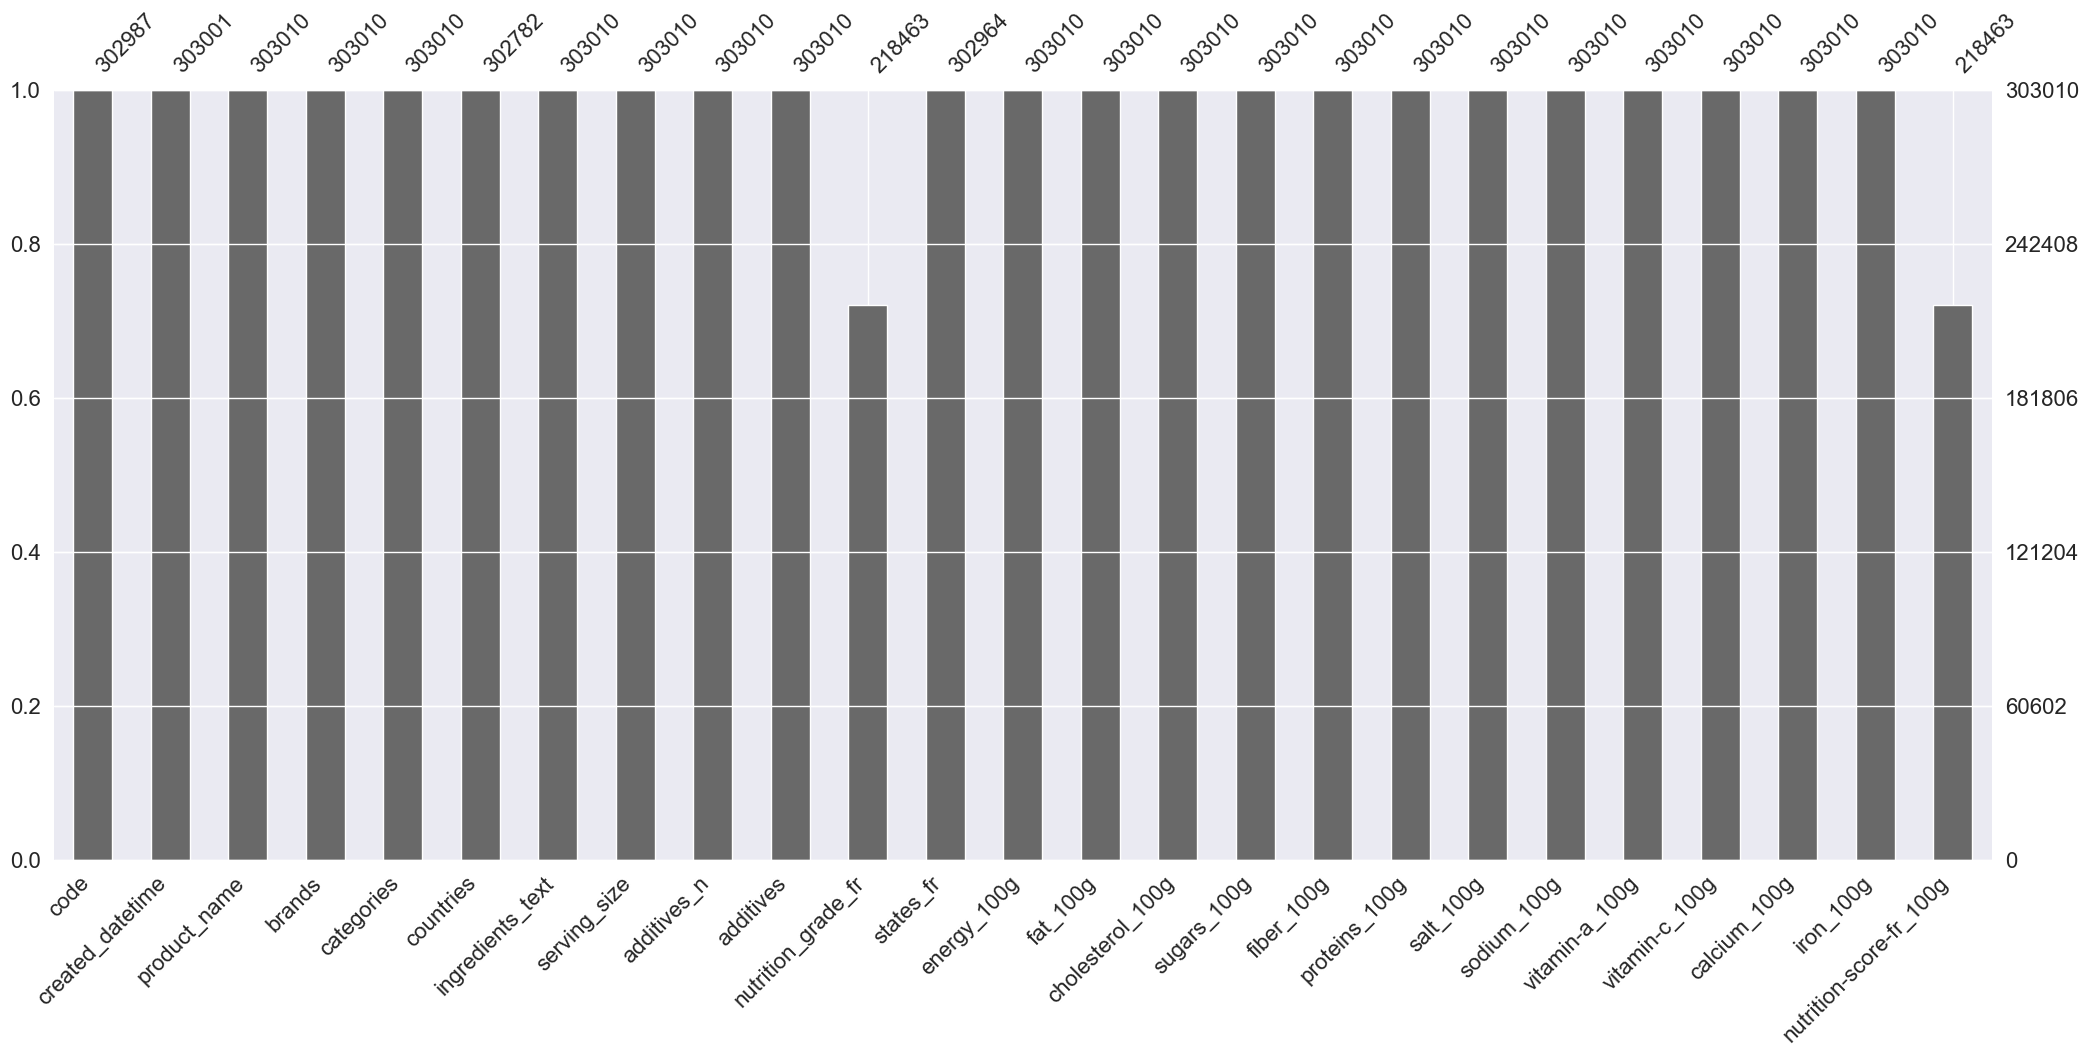

In [77]:
msno.bar(data_keep)
plt.savefig('data_keep_simplle_imputCat.png')

- Imputation de << nutrition-score-fr_100g >>

In [27]:
data_keep['nutrition-score-fr_100g'] = data_keep['nutrition-score-fr_100g'].replace(np.NaN, data_keep['nutrition-score-fr_100g'].mean())

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\3817638865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep['nutrition-score-fr_100g'] = data_keep['nutrition-score-fr_100g'].replace(np.NaN, data_keep['nutrition-score-fr_100g'].mean())


- Vue graphique après imputation de << nutrition-score-fr_100g >>

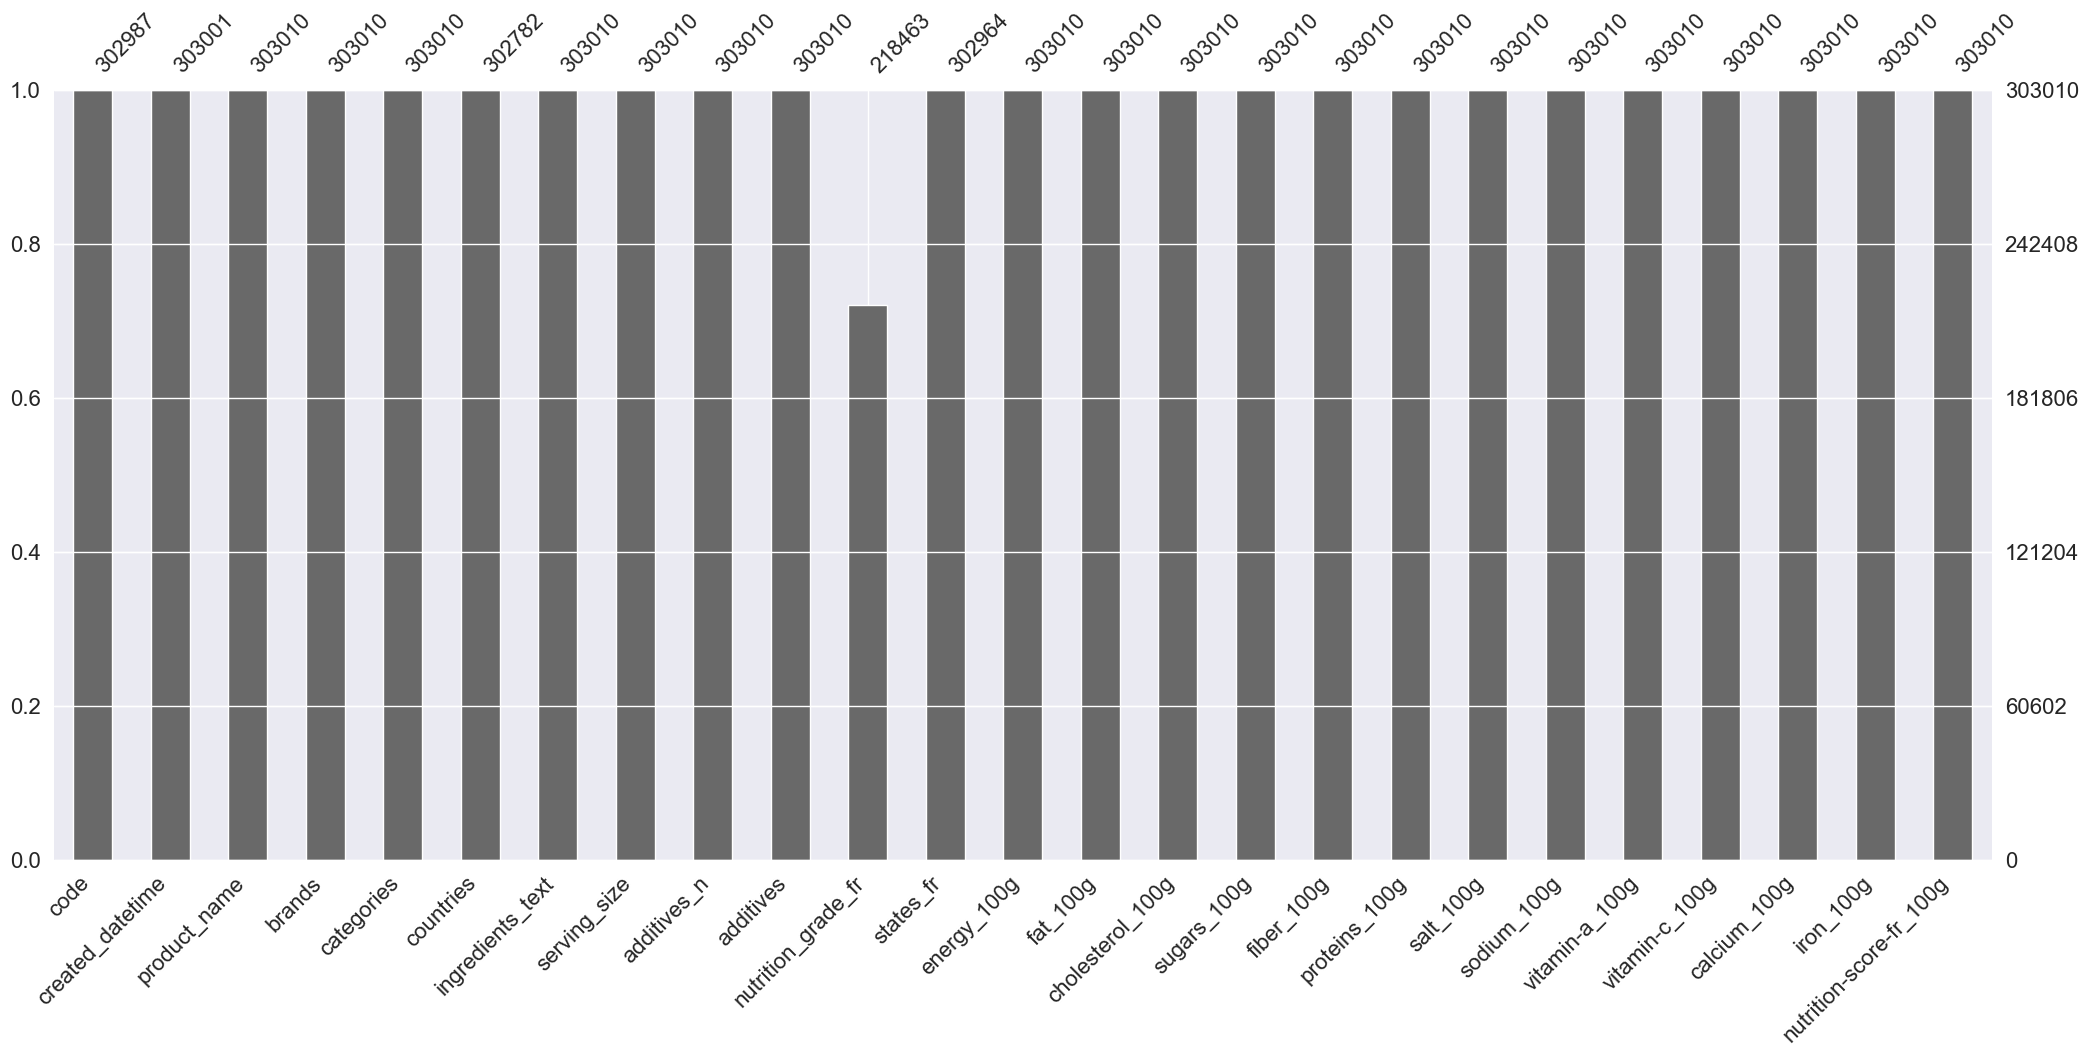

In [28]:
msno.bar(data_keep)
plt.savefig('data_keep_mean_imput_score.png')

### 4.2. Utilisation de la méthode KNN sur le nutritionGrade

- les valeurs distinctes présentes dans la variable nutrigrade

In [80]:
data_keep['nutrition_grade_fr'].unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

- Créer un modèle k-NN 

In [33]:
# on génère un objet correspondant la classe KNeighborsClassifier
model = KNeighborsClassifier()

- Diviser les données en ensembles d'entraînement et de test

In [29]:
# On divise notre jeu de données en deux échantillons basés sur la variable nutrition grade :
# un pour entrainer notre model
# et le second pour tester notre model
train = data_keep[data_keep['nutrition_grade_fr'].notnull()]
test = data_keep[data_keep['nutrition_grade_fr'].isnull()]

In [30]:
train.head()

,code,created_datetime,product_name,brands,categories,countries,ingredients_text,serving_size,additives_n,additives,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
1,0000000004530,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),3.117776,[ bananas -> en:bananas ] [ vegetable-oil -...,...,14.29,3.6,3.57,1.840622,0.74953,0.000926,0.021400,0.159781,0.00129,14.0
2,0000000004559,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),3.117776,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,...,17.86,7.1,17.86,0.635000,0.25000,0.000926,0.040677,0.071000,0.00129,0.0
3,0000000016087,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),3.117776,[ organic-hazelnuts -> en:organic-hazelnuts ...,...,3.57,7.1,17.86,1.224280,0.48200,0.000926,0.040677,0.143000,0.00514,12.0
7,0000000016124,2017-03-09T10:35:11Z,Organic Muesli,Daddy's Muesli,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.000000,[ org-oats -> en:org-oats ] [ oats -> en:oa...,...,15.62,9.4,14.06,0.139700,0.05500,0.000926,0.040677,0.062000,0.00422,7.0
12,0000000016872,2017-03-09T10:34:10Z,Zen Party Mix,Sunridge,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.000000,[ roasted-peanuts -> en:roasted-peanuts ] [...,...,3.33,6.7,16.67,1.607820,0.63300,0.000926,0.040677,0.133000,0.00360,12.0


In [84]:
test.head()

,code,created_datetime,product_name,brands,categories,countries,ingredients_text,serving_size,additives_n,additives,nutrition_grade_fr,states_fr,energy_100g,fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,2016-09-17T09:17:46Z,Farine de blé noir,Ferme t'y R'nao,"Snacks sucrés,Biscuits et gâteaux,Biscuits",en:FR,"Carbonated water, natural flavor.",240 ml (8 fl oz),3.117776,[ extra-virgin-olive-oil -> en:extra-virgin-o...,NaN,"A compléter,Informations nutritionnelles à com...",61.572181,17.313025,0.052923,18.84958,4.323521,8.937344,1.840622,0.74953,0.000926,0.040677,0.159781,0.005248,9.151724
4,0000000016094,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,Organic polenta,35 g (0.25 cup),3.117776,[ organic-polenta -> en:organic-polenta ] [...,NaN,"A compléter,Informations nutritionnelles compl...",61.572181,1.430000,0.052923,18.84958,5.700000,8.570000,1.840622,0.74953,0.000926,0.040677,0.159781,0.005248,9.151724
5,0000000016100,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),3.117776,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,"A compléter,Informations nutritionnelles compl...",61.572181,18.270000,0.052923,11.54000,7.700000,13.460000,1.840622,0.74953,0.000926,0.040677,0.038000,0.003460,9.151724
6,0000000016117,2017-03-09T10:35:30Z,Organic Long Grain White Rice,Lundberg,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,Organic long grain white rice,45 g (0.25 cup),3.117776,[ organic-long-grain-white-rice -> en:organic...,NaN,"A compléter,Informations nutritionnelles compl...",61.572181,17.313025,0.052923,18.84958,4.323521,8.890000,1.840622,0.74953,0.000926,0.002700,0.044000,0.005248,9.151724
8,0000000016193,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,Equal Exchange,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Organic chocolate liquor, organic raw cane sug...",40 g (40 g),3.117776,[ organic-chocolate-liquor -> en:organic-choc...,NaN,"A compléter,Informations nutritionnelles compl...",61.572181,37.500000,0.052923,42.50000,7.500000,5.000000,1.840622,0.74953,0.000926,0.040677,0.050000,0.011250,9.151724


- Déterminer nos données d'entraînement et de test en fonction données de prédicateurs

In [34]:
# On détermine nos variables pour l'entrainement et le test de notre model en se basant sur les données des voisins 
predictors = ['nutrition-score-fr_100g', 'additives_n']
x_train = train[predictors]
x_test = test[predictors]

y_train = train['nutrition_grade_fr']

- Entrainer notre model sur les données de l'échantillon d'entrainement

In [35]:
# On entraine notre model avec la méthode fit()
model.fit(x_train, y_train)

KNeighborsClassifier()

- Détermination des valeurs manquantes

In [37]:
# On effectue une prédication pour déterminer nos valeurs manquantes
predicted = model.predict(x_test)
predicted.tolist()

['c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'd',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'd',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'd',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'd',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c',
 'c'

- Injection des données de test à notre échantillon de test

In [38]:
test['nutrition_grade_fr'] = predicted

C:\Users\tidib\AppData\Local\Temp\ipykernel_17148\2700416858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['nutrition_grade_fr'] = predicted


In [39]:
test.head()

,code,created_datetime,product_name,brands,categories,countries,ingredients_text,serving_size,additives_n,additives,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000003087,2016-09-17T09:17:46Z,Farine de blé noir,Ferme t'y R'nao,"Snacks sucrés,Biscuits et gâteaux,Biscuits",en:FR,"Carbonated water, natural flavor.",240 ml (8 fl oz),3.117776,[ extra-virgin-olive-oil -> en:extra-virgin-o...,...,18.84958,4.323521,8.937344,1.840622,0.74953,0.000926,0.040677,0.159781,0.005248,9.151724
4,0000000016094,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,Organic polenta,35 g (0.25 cup),3.117776,[ organic-polenta -> en:organic-polenta ] [...,...,18.84958,5.700000,8.570000,1.840622,0.74953,0.000926,0.040677,0.159781,0.005248,9.151724
5,0000000016100,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,Unfi,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),3.117776,[ rolled-oats -> en:rolled-oats ] [ oats ->...,...,11.54000,7.700000,13.460000,1.840622,0.74953,0.000926,0.040677,0.038000,0.003460,9.151724
6,0000000016117,2017-03-09T10:35:30Z,Organic Long Grain White Rice,Lundberg,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,Organic long grain white rice,45 g (0.25 cup),3.117776,[ organic-long-grain-white-rice -> en:organic...,...,18.84958,4.323521,8.890000,1.840622,0.74953,0.000926,0.002700,0.044000,0.005248,9.151724
8,0000000016193,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,Equal Exchange,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Organic chocolate liquor, organic raw cane sug...",40 g (40 g),3.117776,[ organic-chocolate-liquor -> en:organic-choc...,...,42.50000,7.500000,5.000000,1.840622,0.74953,0.000926,0.040677,0.050000,0.011250,9.151724


- Concatenation de nos échantillons après imputations  des prédictions

In [40]:
data_after_cleaning = pd.concat([train,test])

In [41]:
data_after_cleaning.head() 

,code,created_datetime,product_name,brands,categories,countries,ingredients_text,serving_size,additives_n,additives,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
1,0000000004530,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),3.117776,[ bananas -> en:bananas ] [ vegetable-oil -...,...,14.29,3.6,3.57,1.840622,0.74953,0.000926,0.021400,0.159781,0.00129,14.0
2,0000000004559,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),3.117776,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,...,17.86,7.1,17.86,0.635000,0.25000,0.000926,0.040677,0.071000,0.00129,0.0
3,0000000016087,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),3.117776,[ organic-hazelnuts -> en:organic-hazelnuts ...,...,3.57,7.1,17.86,1.224280,0.48200,0.000926,0.040677,0.143000,0.00514,12.0
7,0000000016124,2017-03-09T10:35:11Z,Organic Muesli,Daddy's Muesli,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.000000,[ org-oats -> en:org-oats ] [ oats -> en:oa...,...,15.62,9.4,14.06,0.139700,0.05500,0.000926,0.040677,0.062000,0.00422,7.0
12,0000000016872,2017-03-09T10:34:10Z,Zen Party Mix,Sunridge,"Snacks sucrés,Biscuits et gâteaux,Biscuits",US,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.000000,[ roasted-peanuts -> en:roasted-peanuts ] [...,...,3.33,6.7,16.67,1.607820,0.63300,0.000926,0.040677,0.133000,0.00360,12.0


In [42]:
data_after_cleaning.shape

(303010, 25)

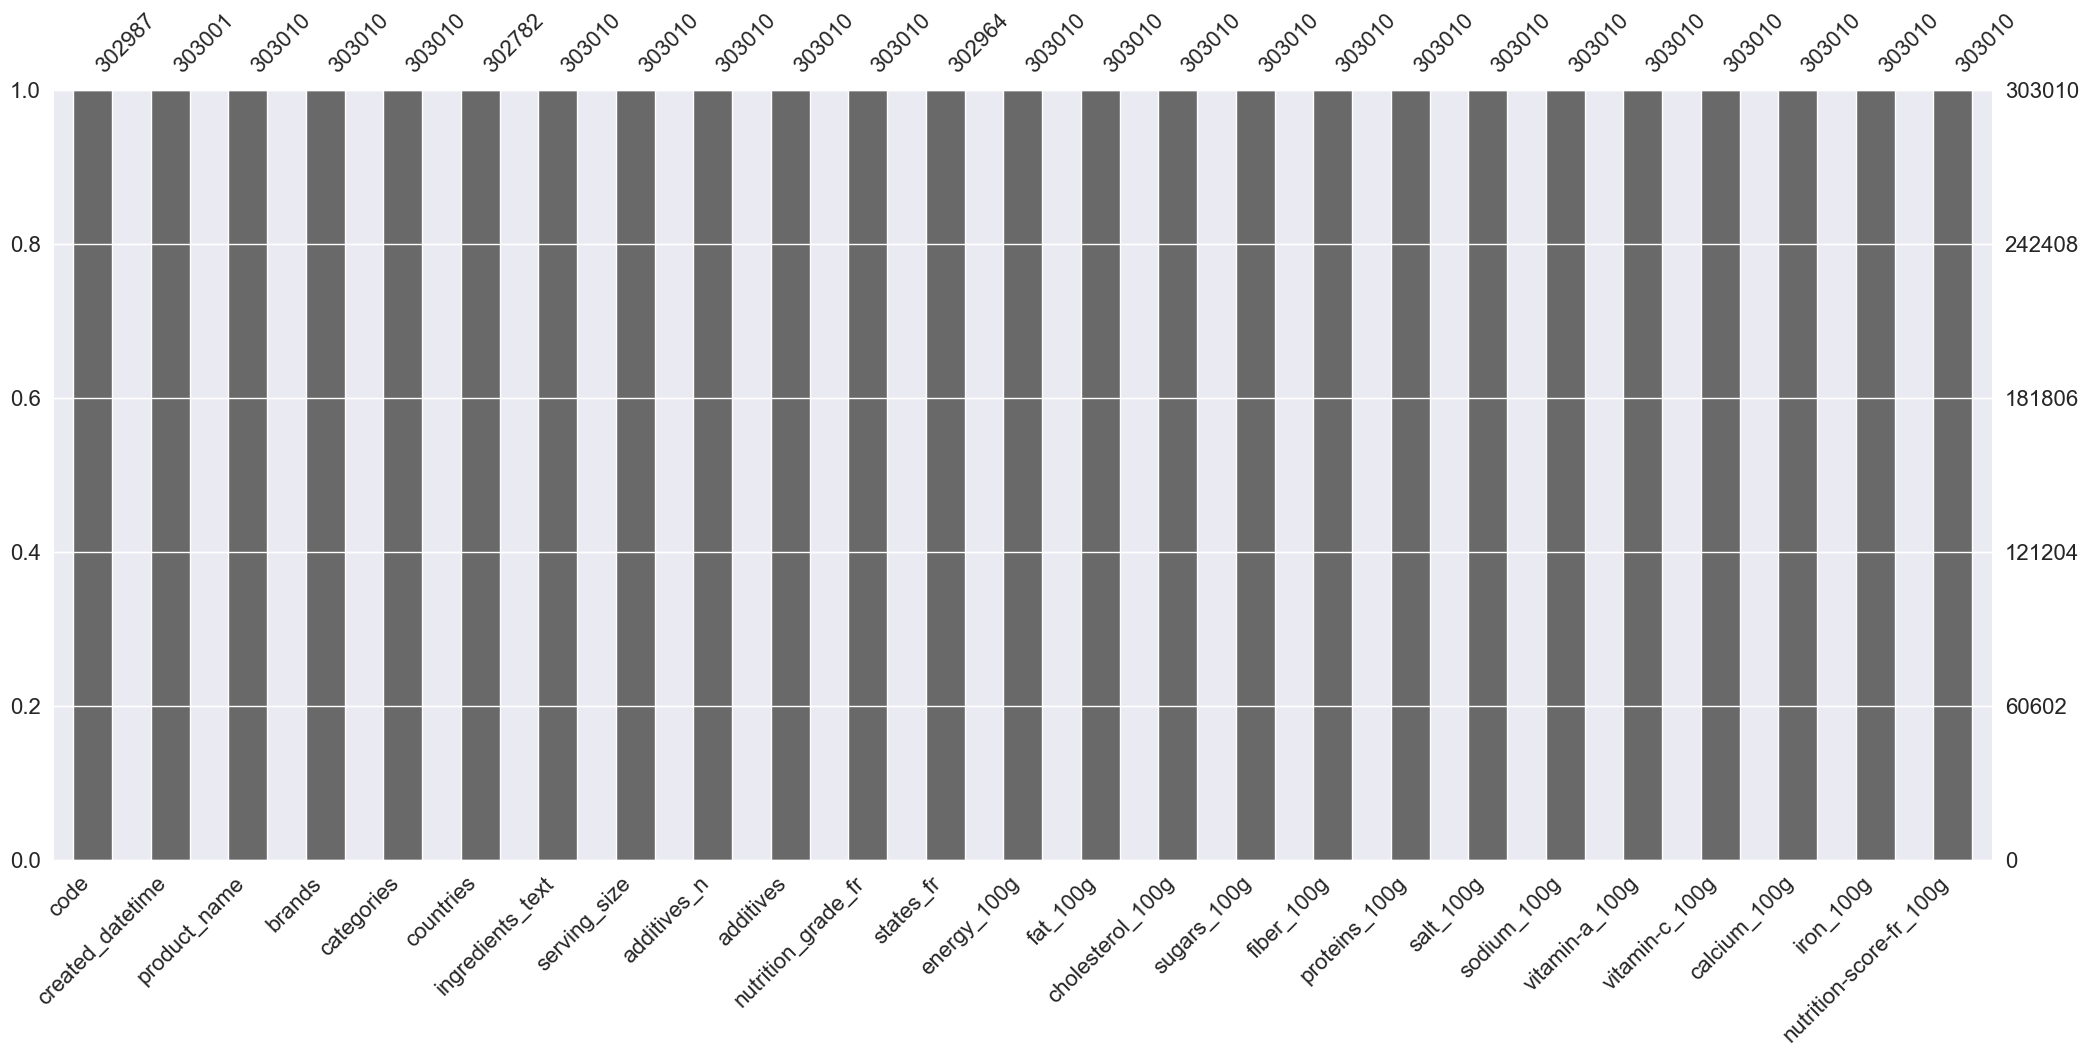

In [43]:
msno.bar(data_after_cleaning)
plt.savefig('data_after_cleanning.png')

## 5. Conclusion

- Taux de remplissage après traitements et imputations

In [44]:
# Une fontion pour déterminer le taux de remplissage de notre jeu de données après imputation
def filling_rate_after_cleaning(df):
    val_notnull = df.count().sum()
    lig,col=df.shape
    taux=val_notnull/(lig*col)*100   
    # Informations générales pour le camembert
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Taux de remplissage après imputation", fontsize=25) 

    ax.axis("equal") 

    # Afficher le graphique à secteurs
    ax.pie([taux, 100 - taux], labels=["Taux de remplissage", "Taux de valeurs manquantes"],autopct='%0.2f%%',explode=(0,0.1),radius=1)
    plt.legend(["Taux de remplissage", "Taux de valeurs manquantes"])

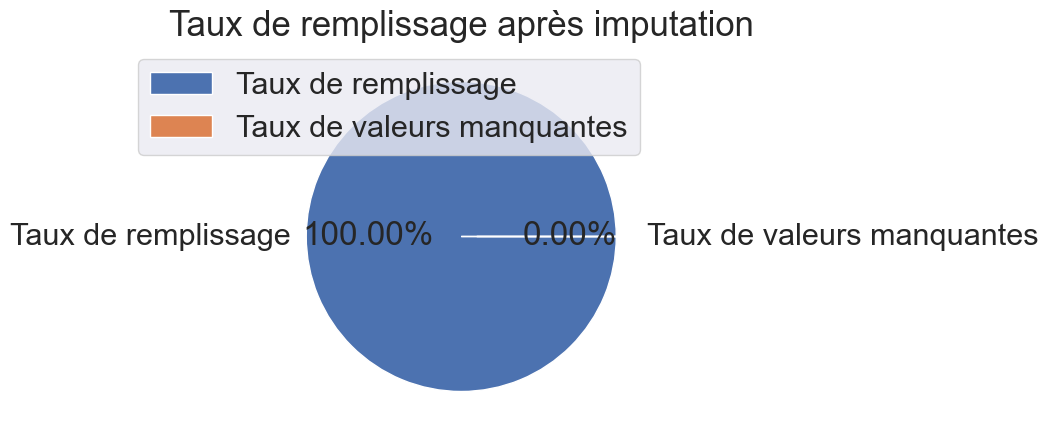

In [45]:
# Affichage du taux après imputation
filling_rate_after_cleaning(data_after_cleaning)
plt.savefig('rate_data_after.png')

- Exportation des données après nettoyage

In [97]:
data_after_cleaning.to_csv('./data/data_after_cleaning.csv',index=False)